© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University,
GNU Lesser General Public License v3.0

# Processing Results - Calculating Zonal Statistics

This notebook illustrates the statistical evaluation on a national scale for the total heat demand using `rasterstats` and `pandas`.

## Importing Libraries

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio

import sys 
sys.path.insert(0, '../pyhd/')
import processing

## Calculating Zonal Statistics

The zonal statistics are calculated with the function `calculate_zonal_statistics`. 

In [2]:
gdf_stats = processing.calculate_zonal_stats("../data/nw_dvg1_rbz.shp", 
                                             "../data/HD_NRW.tif",
                                             'EPSG:3034')
gdf_stats

,geometry,ART,GN,KN,STAND,min,max,std,median,Area (planimetric),Total Heat Demand,Average Heat demand per unit area,Share of Total HD [%],Share of Total Area [%],Heatet Area,Share of Heated Area [%]
0,"POLYGON ((3854043.358 2686588.658, 3854042.704...",R,Arnsberg,05900000,20230612,3.024974e-06,21699.841028,351.107975,88.114117,7.471599e+09,4.689531e+07,206.001944,21.437292,23.485618,2.276161e+09,30.464174
1,"POLYGON ((3922577.630 2751867.434, 3922590.877...",R,Detmold,05700000,20230612,6.662710e-08,40566.944918,265.277509,46.066755,6.086689e+09,2.959064e+07,134.484551,13.526791,19.132405,2.200020e+09,36.144783
2,"MULTIPOLYGON (((3815551.417 2711668.010, 38155...",R,Köln,05300000,20230612,3.148388e-06,71665.631370,382.872868,106.194020,6.866552e+09,5.063581e+07,217.321986,23.147186,21.583762,2.329694e+09,33.928151
3,"POLYGON ((3808552.027 2712730.070, 3808544.236...",R,Düsseldorf,05100000,20230612,3.338104e-07,27773.812359,421.633761,112.014765,4.935276e+09,6.073095e+07,259.500693,27.761986,15.513148,2.340003e+09,47.413813
4,"MULTIPOLYGON (((3827457.753 2766673.130, 38274...",R,Münster,05500000,20230612,2.745344e-06,35052.144019,260.557451,33.163934,6.453391e+09,3.090307e+07,134.728460,14.126745,20.285067,2.293439e+09,35.538502


In [3]:
gdf_stats['coords'] = gdf_stats['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf_stats['coords'] = [coords[0] for coords in gdf_stats['coords']]

## Plotting Results

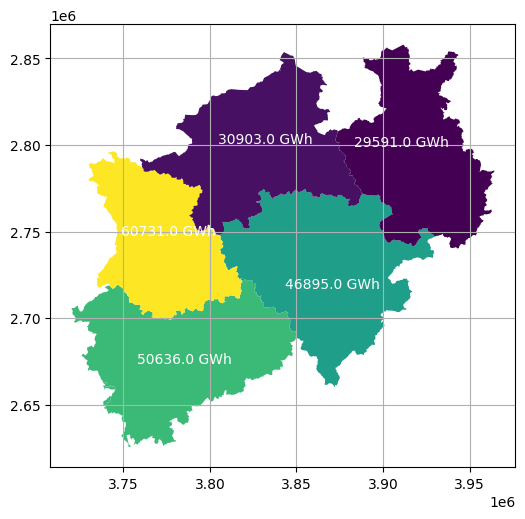

In [4]:
fix, ax = plt.subplots(1, figsize=(6,6))

gdf_stats.plot(ax=ax, column='Total Heat Demand')

for idx, row in gdf_stats.iterrows():
    
    plt.annotate(text=str(np.round(row['Total Heat Demand']/1000,
                                   0)) + ' GWh', 
                 xy=row['coords'],
                 horizontalalignment='center', 
                 color = 'white')

plt.grid()

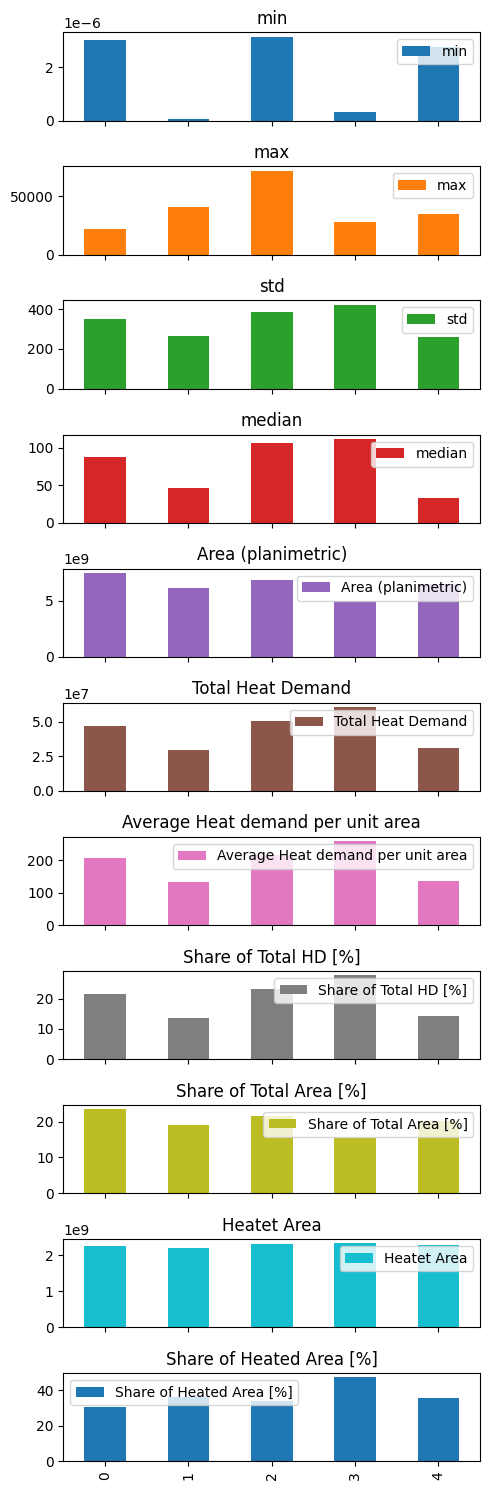

In [5]:
gdf_stats.plot(kind="bar", subplots=True, figsize=(5,15)) 

plt.tight_layout()

In [6]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)

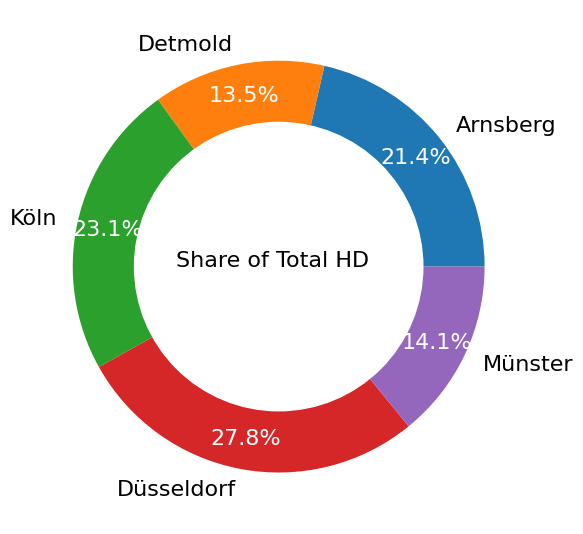

In [15]:
plt.figure(figsize=(6,6))
wedges, texts,  autotexts = plt.pie(gdf_stats['Share of Total HD [%]'].values, 
                                    labels=gdf_stats['GN'].to_list(), 
                                    autopct=lambda pct: func(pct, 
                                                             gdf_stats['Share of Total HD [%]'].values), 
                                    pctdistance=0.85, 
                                    textprops={'fontsize': 16})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
plt.setp(autotexts, size=16, color='white')
p.gca().add_artist(my_circle)
plt.text(-0.5,0, 'Share of Total HD', fontsize=16)
plt.tight_layout()
plt.show()

#plt.savefig('Share_of_total_HD.png', dpi=300)

## Plotting Histogram

In [33]:
raster = rasterio.open("../data/HD_NRW.tif")
data = raster.read(1)[np.where(raster.read(1)>0)]
data = data[np.where(data<20000)]
data

array([1.19048102, 1.32890383, 8.96107116, ..., 0.12207658, 1.05377195,
       0.10962027])

In [34]:
max(data)

18045.648372855034

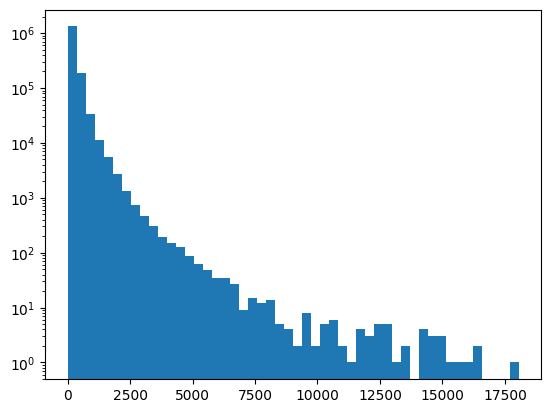

In [37]:
plt.hist(data, bins=50)
plt.yscale('log')